In [230]:
#import modules
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [231]:
train_path = 'titanic/train.csv'
test_path = 'titanic/test.csv'

# Read a comma-separated values (csv) file into pandas DataFrame
train = pd.read_csv(train_path)
test = pd.read_csv(test_path)

# shape of tha data
print('Train shape: ', train.shape)
print('Test shape: ', test.shape)

Train shape:  (891, 12)
Test shape:  (418, 11)


In [232]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [233]:
#Check for duplicates
print(train.duplicated().value_counts())
print("There are no duplicates.")

False    891
dtype: int64
There are no duplicates.


In [234]:
train.head(5)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [235]:
train.describe()
#Apparently only 38% Survived

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [236]:
test.head(5)

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

In [237]:
X_train = train.drop(['Survived'], axis=1)
y_train = train['Survived']

In [238]:
#Checking nulls
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [239]:
X_train.describe()

PassengerId      Pclass         Age       SibSp       Parch        Fare
count   891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean    446.000000    2.308642   29.699118    0.523008    0.381594   32.204208
std     257.353842    0.836071   14.526497    1.102743    0.806057   49.693429
min       1.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%     223.500000    2.000000   20.125000    0.000000    0.000000    7.910400
50%     446.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%     668.500000    3.000000   38.000000    1.000000    0.000000   31.000000
max     891.000000    3.000000   80.000000    8.000000    6.000000  512.329200

#### Survived (Target variable)

In [240]:
y_train.value_counts()
# 0: not survived
# 1: survived

0    549
1    342
Name: Survived, dtype: int64

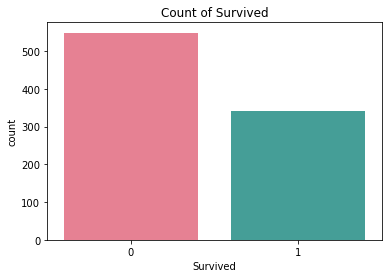

In [241]:
#Let's look at Pclass's distribution
ax = sns.countplot(x=y_train, palette="husl")
plt.title("Count of Survived")
plt.show()

In [242]:
print("Percentage of survived:", round(len(y_train[y_train==1])/len(y_train), 2)*100)

Percentage of survived: 38.0


#### Pclass

In [243]:
#Pclass
X_train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

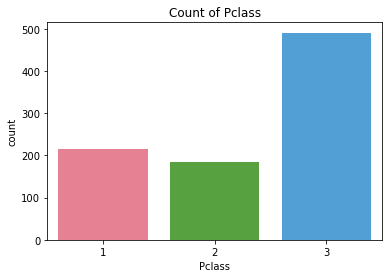

In [244]:
#Let's look at Pclass's distribution
ax = sns.countplot(x="Pclass", data=X_train, palette="husl")
plt.title("Count of Pclass")
plt.show()

In [245]:
sur = train[train["Survived"]==1]
print("Percentage of survivals in class 1:", round(len(sur[sur["Pclass"]==1])/len(train[train.Pclass == 1].Survived), 2))
print("Percentage of survivals in class 2:", round(len(sur[sur["Pclass"]==2])/len(train[train.Pclass == 2].Survived), 2))
print("Percentage of survivals in class 3:", round(len(sur[sur["Pclass"]==3])/len(train[train.Pclass == 3].Survived), 2))

Percentage of survivals in class 1: 0.63
Percentage of survivals in class 2: 0.47
Percentage of survivals in class 3: 0.24


63% of 1st class passengers survived, which is higher than the other classes, but not that much.

#### Sex

In [246]:
X_train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

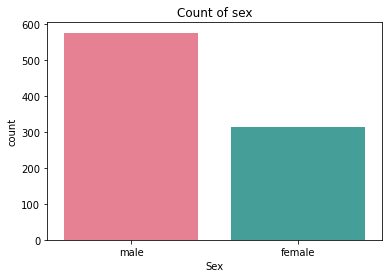

In [247]:
#Let's look at sex's distribution
ax = sns.countplot(x="Sex", data=X_train, palette="husl")
plt.title("Count of sex")
plt.show()

In [248]:
sur = train[train["Survived"]==1]
print("Percentage of female survivals:", round(len(sur[sur["Sex"]=="female"])/len(train[train.Sex == 'female'].Survived), 2))
print("Percentage of male survivals:", round(len(sur[sur["Sex"]=="male"])/len(train[train.Sex == 'male'].Survived), 2))

Percentage of female survivals: 0.74
Percentage of male survivals: 0.19


From the survivals, 74% were woman.

#### Age

In [249]:
def age_group_convert(df):
    return pd.DataFrame(pd.cut(df.Age, [0, 15, 30, 50, 100], labels=["0-15", "15-30", "30-50", "50-100"]))

train["Age_bins"] = age_group_convert(train)

In [250]:
train["Age_bins"].value_counts()

15-30     326
30-50     241
0-15       83
50-100     64
Name: Age_bins, dtype: int64

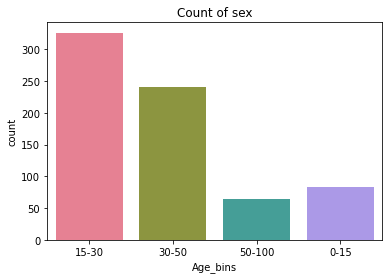

In [251]:
#Let's look at age's distribution
ax = sns.countplot(x="Age_bins", data=train, palette="husl")
plt.title("Count of sex")
plt.show()

In [252]:
sur = train[train["Survived"]==1]
print("Percentage of 0-15 year survivals:", round(len(sur[sur["Age_bins"]=="0-15"])/len(train[train.Age_bins == "0-15"].Survived), 2))
print("Percentage of 15-30 year survivals:", round(len(sur[sur["Age_bins"]=="15-30"])/len(train[train.Age_bins == "15-30"].Survived), 2))
print("Percentage of 30-50 year survivals:", round(len(sur[sur["Age_bins"]=="30-50"])/len(train[train.Age_bins == "30-50"].Survived), 2))
print("Percentage of 50-100 year survivals:", round(len(sur[sur["Age_bins"]=="50-100"])/len(train[train.Age_bins == "50-100"].Survived), 2))

Percentage of 0-15 year survivals: 0.59
Percentage of 15-30 year survivals: 0.36
Percentage of 30-50 year survivals: 0.42
Percentage of 50-100 year survivals: 0.34


Seems like people between 0 and 15 years survived almost 60%. From the 30-50, 42% survived.

#### SibSp

In [253]:
train["SibSp"].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

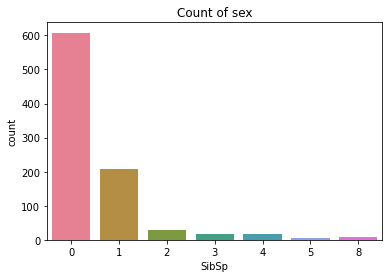

In [254]:
#Let's look at sibSp's distribution
ax = sns.countplot(x="SibSp", data=train, palette="husl")
plt.title("Count of sex")
plt.show()

In [255]:
sur = train[train["Survived"]==1]
print("Percentage of survivals of SibSp equal to 0 :", round(len(sur[sur["SibSp"]==0])/len(train[train.SibSp == 0].Survived), 2))
print("Percentage of survivals of SibSp equal to 1:", round(len(sur[sur["SibSp"]==1])/len(train[train.SibSp == 1].Survived), 2))


Percentage of survivals of SibSp equal to 0 : 0.35
Percentage of survivals of SibSp equal to 1: 0.54


Apparently, 54% of the passegenrs that survived have 1 siblings / spouses aboard the Titanic

#### Embarked

In [256]:
train["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

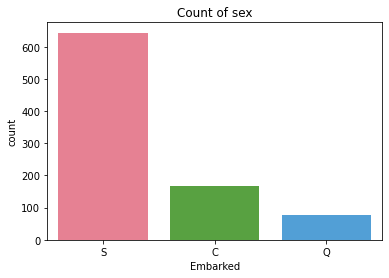

In [257]:
#Let's look at Embarked's distribution
ax = sns.countplot(x="Embarked", data=train, palette="husl")
plt.title("Count of sex")
plt.show()

In [258]:
sur = train[train["Survived"]==1]
print("Percentage of survivals of Embarked in Southampton:", round(len(sur[sur["Embarked"]=="S"])/len(train[train.Embarked == "S"].Survived), 2))
print("Percentage of survivals of  Embarked in Cherbourg:", round(len(sur[sur["Embarked"]=="C"])/len(train[train.Embarked == "C"].Survived), 2))
print("Percentage of survivals of Embarked in Queenstown:", round(len(sur[sur["Embarked"]=="Q"])/len(train[train.Embarked == "Q"].Survived), 2))


Percentage of survivals of Embarked in Southampton: 0.34
Percentage of survivals of  Embarked in Cherbourg: 0.55
Percentage of survivals of Embarked in Queenstown: 0.39


#### Correlations

In [259]:
display(train.corr().style.background_gradient(cmap='YlGnBu'))

## Train the Model

In [260]:
from sklearn import set_config; set_config(display='diagram')
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, FunctionTransformer, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import FeatureUnion
import pickle
import joblib

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.cluster import KMeans

In [261]:
#When having numerical and categorical features they need different transformations
from sklearn import set_config; set_config(display='diagram')
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, FunctionTransformer, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector
from sklearn.impute import SimpleImputer

numeric_features = [ 'Fare', 'Age']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_features = ['Embarked', 'Sex', 'Pclass']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown="ignore"))
])

preprocessor= ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [262]:
data_prepared = preprocessor.fit_transform(train)
df = pd.DataFrame(data_prepared)
df.head(5)

0         1    2    3    4    5    6    7    8    9
0 -0.502445 -0.565736  0.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0
1  0.786845  0.663861  1.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0
2 -0.488854 -0.258337  0.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0
3  0.420730  0.433312  0.0  0.0  1.0  1.0  0.0  1.0  0.0  0.0
4 -0.486337  0.433312  0.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0

In [263]:
df.shape

(891, 10)

## Logistic Regression

In [189]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

#Use it with a classifier/regressor
logit_model_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('logit', LogisticRegression())
])

logit_model_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Fare', 'Age']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Embarked', 'Sex',
                                                   'Pclass'])])),
                ('logit', LogisticRegression())])

In [210]:
from sklearn.metrics import precision_score, recall_score, f1_score

logit_model_pipeline.fit(X_train, y_train)
y_pred = logit_model_pipeline.predict(X_train)

print("The accuracy score of Logit model is {}".format(accuracy_score(y_train, y_pred)))
print("The precision score of Logit model is {}".format(precision_score(y_train, y_pred)))
print("The recall score of Logit model is {}".format(recall_score(y_train, y_pred)))
print("The f1 score of Logit model is {}".format(f1_score(y_train, y_pred)))

The accuracy score of Logit model is 0.792368125701459
The precision score of Logit model is 0.7415384615384616
The recall score of Logit model is 0.7046783625730995
The f1 score of Logit model is 0.7226386806596703


## Decision Tree

In [209]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

max_depth=[2,5,10, 20]
min_samples_split = [2, 5, 10, 20]
tree_cls= Pipeline(steps=[
                     ('preprocessor', preprocessor),
                    ('classifier', DecisionTreeClassifier(random_state=42))])

param_grid = {"classifier__max_depth": max_depth, "classifier__min_samples_split": min_samples_split}

grid = GridSearchCV(tree_cls, param_grid, cv = 5, scoring= 'neg_mean_squared_error')
grid.fit(X_train, y_train)

y_pred = grid.predict(X_train)

print("The accuracy score of Logit model is {}".format(accuracy_score(y_train, y_pred)))
print("The precision score of Logit model is {}".format(precision_score(y_train, y_pred)))
print("The recall score of Logit model is {}".format(recall_score(y_train, y_pred)))
print("The f1 score of Logit model is {}".format(f1_score(y_train, y_pred)))

The accuracy score of Logit model is 0.8406285072951739
The precision score of Logit model is 0.8311258278145696
The recall score of Logit model is 0.7339181286549707
The f1 score of Logit model is 0.7795031055900622


## Random Forest

In [307]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

max_depth=[2,5,10, 20]
min_samples_split = [2, 5, 10, 20]
tree_for= Pipeline(steps=[
                     ('preprocessor', preprocessor),
                    ('classifier', RandomForestClassifier(random_state=42))])

param_grid = {"classifier__max_depth": max_depth, "classifier__min_samples_split": min_samples_split}

grid_for = GridSearchCV(tree_for, param_grid, cv = 5, scoring= 'neg_mean_squared_error')
grid_for.fit(X_train, y_train)

y_pred = grid_for.predict(X_train)

print("The precision score of Logit model is {}".format(accuracy_score(y_train, y_pred)))
print("The precision score of Logit model is {}".format(precision_score(y_train, y_pred)))
print("The recall score of Logit model is {}".format(recall_score(y_train, y_pred)))
print("The f1 score of Logit model is {}".format(f1_score(y_train, y_pred)))

The precision score of Logit model is 0.9427609427609428
The precision score of Logit model is 0.9589905362776026
The recall score of Logit model is 0.8888888888888888
The f1 score of Logit model is 0.9226100151745068


## AdaBoost

In [213]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV

n_estimators = [50, 100, 200]
clf= Pipeline(steps=[
                     ('preprocessor', preprocessor),
                    ('classifier', AdaBoostClassifier(random_state=42))])

param_grid = {"classifier__n_estimators": n_estimators}

grid = GridSearchCV(clf, param_grid, cv = 5, scoring= 'accuracy')
grid.fit(X_train, y_train)

y_pred = grid.predict(X_train)

print("The precision score of Logit model is {}".format(accuracy_score(y_train, y_pred)))
print("The precision score of Logit model is {}".format(precision_score(y_train, y_pred)))
print("The recall score of Logit model is {}".format(recall_score(y_train, y_pred)))
print("The f1 score of Logit model is {}".format(f1_score(y_train, y_pred)))

The precision score of Logit model is 0.8439955106621774
The precision score of Logit model is 0.8066465256797583
The recall score of Logit model is 0.7807017543859649
The f1 score of Logit model is 0.7934621099554234


## Stacking Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier

estimators = [
    ('forest', RandomForestClassifier(random_state=42)),
    ('boosting', GradientBoostingClassifier(random_state=42, n_iter_no_change=5)),
    ('knn', KNeighborsClassifier()),
    ('logit', LogisticRegression()),
    ('adaboost', AdaBoostClassifier())
    
    
]

stacking_model = Pipeline(steps=[
                     ('preprocessor', preprocessor),
                    ('classifier', StackingClassifier(estimators=estimators, final_estimator=LogisticRegression()))
])



from sklearn.model_selection import RandomizedSearchCV

param_grid = [{
        "classifier__forest__n_estimators": np.arange(5, 50),
        "classifier__boosting__n_estimators": np.arange(5, 50),
        "classifier__knn__n_neighbors": np.arange(5, 50),
        "classifier__logit__C": [1, 10, 100, 1000],
        "classifier__adaboost__n_estimators": np.arange(5, 50)
    }]

random_search = RandomizedSearchCV(stacking_model, param_grid, cv=5, scoring='f1',
                                  n_iter=100, n_jobs=-1)


random_search.fit(X_train, y_train)

y_pred = random_search.predict(X_train)

print("The precision score of Logit model is {}".format(accuracy_score(y_train, y_pred)))
print("The precision score of Logit model is {}".format(precision_score(y_train, y_pred)))
print("The recall score of Logit model is {}".format(recall_score(y_train, y_pred)))
print("The f1 score of Logit model is {}".format(f1_score(y_train, y_pred)))

The best model seems to be the Random Forest Classifier.
So, let's predict the test set

In [ ]:
test["Survived"] = random_search.predict(test)
predictions = test[["PassengerId", "Survived"]]
predictions.set_index('PassengerId', inplace=True)
predictions.to_csv("predictions.csv")

In [ ]:
predictions

In [290]:
print("Thank you for your time :) ")

Thank you for your time :) 
